In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
from scipy.stats import loglaplace,chi2
from labellines import labelLine, labelLines

dir = '/home/joe/data/jhu/COVID-19/csse_covid_19_data/csse_covid_19_time_series/'

dataConfirmed = dir + 'time_series_19-covid-Confirmed.csv'
dataDeaths = dir + 'time_series_19-covid-Deaths.csv'
dataRecovered = dir + 'time_series_19-covid-Recovered.csv'

nTop = 10

dfConfirmed = pd.read_csv(dataConfirmed)
dfDeaths = pd.read_csv(dataDeaths)
dfRecovered = pd.read_csv(dataRecovered)
dfConfirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,53,59,70,75,82,114,147,177,212,272
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,581,639,639,701,773,839,825,878,889,924
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,160,178,178,200,212,226,243,266,313,345
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,129,149,149,197,238,428,566,673,790,900


In [39]:
dfC = dfConfirmed.drop(['Province/State','Lat','Long'],axis=1)
dfC = dfC.rename(columns={"Country/Region": 'country'})
dfC.head()

,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,Thailand,2,3,5,7,8,8,14,14,14,...,53,59,70,75,82,114,147,177,212,272
1,Japan,2,1,2,2,4,4,7,7,11,...,581,639,639,701,773,839,825,878,889,924
2,Singapore,0,1,3,3,4,5,7,7,10,...,160,178,178,200,212,226,243,266,313,345
3,Nepal,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Malaysia,0,0,0,3,4,4,4,7,8,...,129,149,149,197,238,428,566,673,790,900


In [65]:
cumCasesName = 'Cumulative Cases'
dfG = dfC.groupby('country')[dfC.columns[-1]].sum().reset_index(name=cumCasesName)
countries = dfG.country.tolist()

In [60]:
allCases = dfG[cumCasesName].sum()
dfT = dfG.sort_values(cumCasesName, ascending=False).head(nTop)
topCases = dfT[cumCasesName].sum()
otherCases = allCases - topCases
print(allCases)
print(topCases)
print(otherCases)

dfOtherRow = pd.DataFrame({"country":['Other'], "Cumulative Cases":[otherCases]}) 
dfTO = dfT.append(dfOtherRow)
dfTO

242708
213861
28847


,country,Cumulative Cases
30,China,81156
73,Italy,41035
69,Iran,18407
133,Spain,17963
57,Germany,15320
146,US,13677
53,France,10947
79,"Korea, South",8565
138,Switzerland,4075
149,United Kingdom,2716


In [41]:
dfC

,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
0,Thailand,2,3,5,7,8,8,14,14,14,...,53,59,70,75,82,114,147,177,212,272
1,Japan,2,1,2,2,4,4,7,7,11,...,581,639,639,701,773,839,825,878,889,924
2,Singapore,0,1,3,3,4,5,7,7,10,...,160,178,178,200,212,226,243,266,313,345
3,Nepal,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,Malaysia,0,0,0,3,4,4,4,7,8,...,129,149,149,197,238,428,566,673,790,900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,United Kingdom,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
464,Chad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
465,El Salvador,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
466,Fiji,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
dates = dfC.columns[1:]
dfS = pd.DataFrame(columns=dates.insert(0,'country'))
dfS

,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20


In [73]:
for date in dates:
    dfGdate = dfC.groupby('country')[date].sum().reset_index(name=cumCasesName)
    for country in countries:
        print(country)
        row = dfGdate.loc[dfGdate['country'] == country]
        print(row)

Afghanistan
Albania
Algeria
Andorra
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cruise Ship
Cuba
Cyprus
Czechia
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia, The
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Guyana
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Korea, South
Kosovo
Kuwait
Kyrgyzstan
Latvia
Lebanon
Liberia
Liechtenstein
Lithuania
Luxembourg
Malaysia
Maldives
Malta
Martinique
Mauritania
Mauritius
Mexico
Moldova
Monaco
Mongolia
Montenegro
Morocco
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Nigeria
North Ma

Morocco
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Nigeria
North Macedonia
Norway
Oman
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Qatar
Romania
Russia
Rwanda
Saint Lucia
Saint Vincent and the Grenadines
San Marino
Saudi Arabia
Senegal
Serbia
Seychelles
Singapore
Slovakia
Slovenia
Somalia
South Africa
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Taiwan*
Tanzania
Thailand
Togo
Trinidad and Tobago
Tunisia
Turkey
US
Ukraine
United Arab Emirates
United Kingdom
Uruguay
Uzbekistan
Venezuela
Vietnam
Zambia
Afghanistan
Albania
Algeria
Andorra
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cruise Ship
Cuba
Cyprus
Czechia
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
El 

Portugal
Qatar
Romania
Russia
Rwanda
Saint Lucia
Saint Vincent and the Grenadines
San Marino
Saudi Arabia
Senegal
Serbia
Seychelles
Singapore
Slovakia
Slovenia
Somalia
South Africa
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Taiwan*
Tanzania
Thailand
Togo
Trinidad and Tobago
Tunisia
Turkey
US
Ukraine
United Arab Emirates
United Kingdom
Uruguay
Uzbekistan
Venezuela
Vietnam
Zambia
Afghanistan
Albania
Algeria
Andorra
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cruise Ship
Cuba
Cyprus
Czechia
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia, The
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Guya

Paraguay
Peru
Philippines
Poland
Portugal
Qatar
Romania
Russia
Rwanda
Saint Lucia
Saint Vincent and the Grenadines
San Marino
Saudi Arabia
Senegal
Serbia
Seychelles
Singapore
Slovakia
Slovenia
Somalia
South Africa
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Taiwan*
Tanzania
Thailand
Togo
Trinidad and Tobago
Tunisia
Turkey
US
Ukraine
United Arab Emirates
United Kingdom
Uruguay
Uzbekistan
Venezuela
Vietnam
Zambia
Afghanistan
Albania
Algeria
Andorra
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cruise Ship
Cuba
Cyprus
Czechia
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia, The
Georgia
Germany
G

Liechtenstein
Lithuania
Luxembourg
Malaysia
Maldives
Malta
Martinique
Mauritania
Mauritius
Mexico
Moldova
Monaco
Mongolia
Montenegro
Morocco
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Nigeria
North Macedonia
Norway
Oman
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Qatar
Romania
Russia
Rwanda
Saint Lucia
Saint Vincent and the Grenadines
San Marino
Saudi Arabia
Senegal
Serbia
Seychelles
Singapore
Slovakia
Slovenia
Somalia
South Africa
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Taiwan*
Tanzania
Thailand
Togo
Trinidad and Tobago
Tunisia
Turkey
US
Ukraine
United Arab Emirates
United Kingdom
Uruguay
Uzbekistan
Venezuela
Vietnam
Zambia
Afghanistan
Albania
Algeria
Andorra
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Congo (Brazzaville)
Co

Moldova
Monaco
Mongolia
Montenegro
Morocco
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Nigeria
North Macedonia
Norway
Oman
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Qatar
Romania
Russia
Rwanda
Saint Lucia
Saint Vincent and the Grenadines
San Marino
Saudi Arabia
Senegal
Serbia
Seychelles
Singapore
Slovakia
Slovenia
Somalia
South Africa
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Taiwan*
Tanzania
Thailand
Togo
Trinidad and Tobago
Tunisia
Turkey
US
Ukraine
United Arab Emirates
United Kingdom
Uruguay
Uzbekistan
Venezuela
Vietnam
Zambia
Afghanistan
Albania
Algeria
Andorra
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cruise Ship
Cuba
Cyprus
Czechia
Denmark
Djibouti
D

Latvia
Lebanon
Liberia
Liechtenstein
Lithuania
Luxembourg
Malaysia
Maldives
Malta
Martinique
Mauritania
Mauritius
Mexico
Moldova
Monaco
Mongolia
Montenegro
Morocco
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Nigeria
North Macedonia
Norway
Oman
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Qatar
Romania
Russia
Rwanda
Saint Lucia
Saint Vincent and the Grenadines
San Marino
Saudi Arabia
Senegal
Serbia
Seychelles
Singapore
Slovakia
Slovenia
Somalia
South Africa
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Taiwan*
Tanzania
Thailand
Togo
Trinidad and Tobago
Tunisia
Turkey
US
Ukraine
United Arab Emirates
United Kingdom
Uruguay
Uzbekistan
Venezuela
Vietnam
Zambia
Afghanistan
Albania
Algeria
Andorra
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia

Mexico
Moldova
Monaco
Mongolia
Montenegro
Morocco
Namibia
Nepal
Netherlands
New Zealand
Nicaragua
Nigeria
North Macedonia
Norway
Oman
Pakistan
Panama
Paraguay
Peru
Philippines
Poland
Portugal
Qatar
Romania
Russia
Rwanda
Saint Lucia
Saint Vincent and the Grenadines
San Marino
Saudi Arabia
Senegal
Serbia
Seychelles
Singapore
Slovakia
Slovenia
Somalia
South Africa
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Taiwan*
Tanzania
Thailand
Togo
Trinidad and Tobago
Tunisia
Turkey
US
Ukraine
United Arab Emirates
United Kingdom
Uruguay
Uzbekistan
Venezuela
Vietnam
Zambia
Afghanistan
Albania
Algeria
Andorra
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cruise Ship
Cuba
Cyprus
Czechia
Denmark
Dji

San Marino
Saudi Arabia
Senegal
Serbia
Seychelles
Singapore
Slovakia
Slovenia
Somalia
South Africa
Spain
Sri Lanka
Sudan
Suriname
Sweden
Switzerland
Taiwan*
Tanzania
Thailand
Togo
Trinidad and Tobago
Tunisia
Turkey
US
Ukraine
United Arab Emirates
United Kingdom
Uruguay
Uzbekistan
Venezuela
Vietnam
Zambia
Afghanistan
Albania
Algeria
Andorra
Antigua and Barbuda
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas, The
Bahrain
Bangladesh
Barbados
Belarus
Belgium
Benin
Bhutan
Bolivia
Bosnia and Herzegovina
Brazil
Brunei
Bulgaria
Burkina Faso
Cambodia
Cameroon
Canada
Central African Republic
Chad
Chile
China
Colombia
Congo (Brazzaville)
Congo (Kinshasa)
Costa Rica
Cote d'Ivoire
Croatia
Cruise Ship
Cuba
Cyprus
Czechia
Denmark
Djibouti
Dominican Republic
Ecuador
Egypt
El Salvador
Equatorial Guinea
Estonia
Eswatini
Ethiopia
Fiji
Finland
France
Gabon
Gambia, The
Georgia
Germany
Ghana
Greece
Guatemala
Guinea
Guyana
Holy See
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Ital

In [16]:
dfC = dfC.set_index('country').T
dfC = dfC.reset_index()
dfC.head()

country,index,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Australia,Australia,...,"Gambia, The",United Kingdom,"Bahamas, The",Denmark,France,United Kingdom,Chad,El Salvador,Fiji,Nicaragua
0,1/22/20,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,3,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/24/20,5,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/25/20,7,2,3,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/26/20,8,4,4,1,4,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
dfC = dfC.rename(columns={"index": 'date'})
dfC.head()

country,date,Thailand,Japan,Singapore,Nepal,Malaysia,Canada,Australia,Australia,Australia,...,"Gambia, The",United Kingdom,"Bahamas, The",Denmark,France,United Kingdom,Chad,El Salvador,Fiji,Nicaragua
0,1/22/20,2,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1/23/20,3,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1/24/20,5,2,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1/25/20,7,2,3,1,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1/26/20,8,4,4,1,4,0,3,1,0,...,0,0,0,0,0,0,0,0,0,0


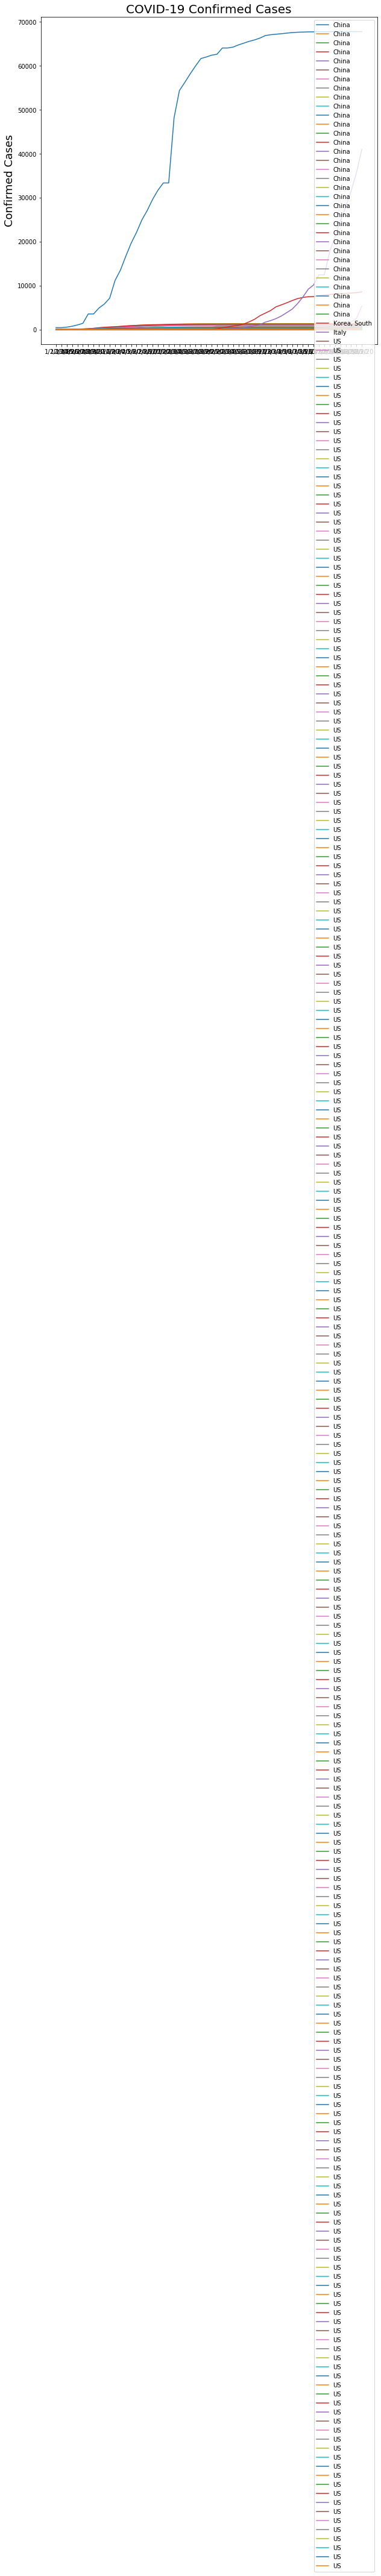

In [18]:
fig = plt.figure(figsize=(10,10))

ax1 = fig.add_subplot(111)
ax1.set_title("COVID-19 Confirmed Cases", fontsize=20)
ax1.set_ylabel('Confirmed Cases', color='black',fontsize=18)
plt.plot(dfC['date'],dfC['China'], label='China')
plt.plot(dfC['date'],dfC['Korea, South'], label = 'Korea, South')
plt.plot(dfC['date'],dfC['Italy'], label='Italy')
plt.plot(dfC['date'],dfC['US'], label='US')
plt.legend()
           
